파이썬 머신러닝 완벽가이드 ch4. 1~ 2 pg. 181~210


### **[개념 정리]**📝

# **CHAPTER 4**

---
### **01.분류의 개요**
- 분류✅: 지도학습의 대표적인 유형
- 나이브 베이즈, 로지스틱 회귀, 결정 트리, 서포트 벡터 머신, 최소근접 알고리즘, 신경망, 앙상블
- 앙상블✅: 서로 다른/같은 알고리즘을 결합. 정형 데이터에 대해 높은 예측 성능 가짐. 배깅(랜덤 포레스트)/부스팅(스래디언트 부스팅) 방식으로 나뉨.
- 결정 트리✅: 앙상블의 기본 알고리즘. 사전 가공의 영향이 적음. 약한 학습기(앙상블에 애용)



---
### **02. 결정 트리**

데이터의 규칙을 학습을 통해 찾아내고 트리 기반의 분류규칙을 만드는 것. 규칙은 알고리즘 성능을 좌우함.

- 규칙노드(규칙조건-피처들의 결합) / 리프노드(결정된 클래스값) / 서브트리
- 규칙이 많을수록 분류가 복잡해지므로 과접합으로 이어짐. 최대한 균일하게 분할하여 적은 노드로 많은 데이터를 분류해야 높은 예측 정확도 가짐







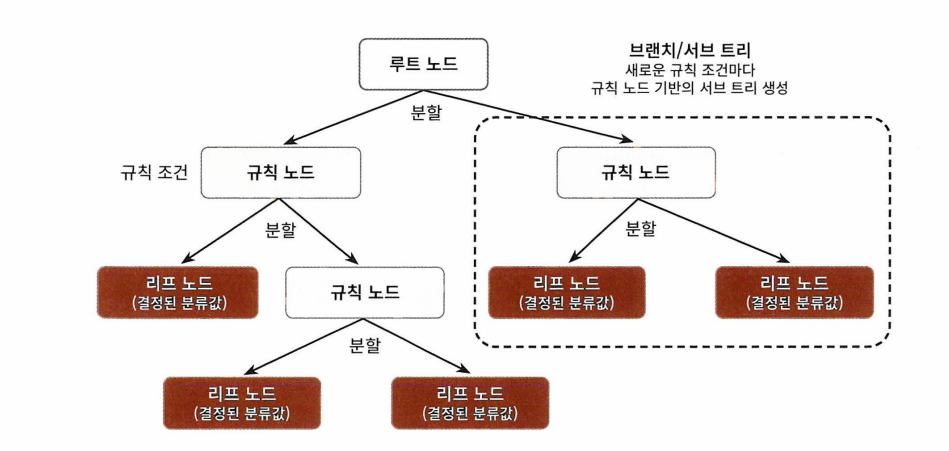

- 균일도: 데이터 구분하는데 필요한 정보의 양에 영향
   - 정보 균일도가 높은 데이터 세트부터 선택 > 서브 데이터 세트 생성 > 균일도 높은 자식 데이터로 자식 트리 생성
   - 측정방법: 정보이득지수(1-엔트로피 지수) 높을수록, 지니계수(0:평등~1:불평등) 낮을수록 균일도 높음
   - DecisionTreeClassifier(): 결정트리 알고리즘, 지니계수를 기본으로 데이터 분할

   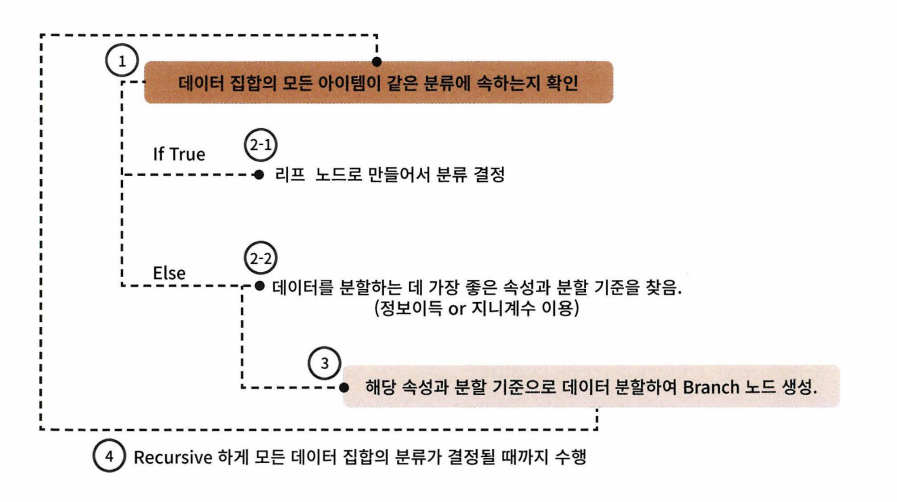

  

(1) 결정 트리 모델의 특징
- 균일도를 기반으로 쉽고 직관적임, 대체로 전처리가 필요없음( 사전 가공 영향 적음)
- 단점: 과적합으로 정확도가 떨어질 우려, 유연대처 X ->> 트리의 크기를 제한하는 튜닝 필요

(2) 결정 트리 파라미터

- DecisionTreeClassifier: 분류 클래스의 결정트리
- DecisionTreeRegressor: 회귀 클래스의 결정트리

✨
파라미터       
```
- min_samples_split: 노드 분할 위한 최소 샘플 데이터 수(시작노드), 작을수록 과적합
- min_samples_leaf: 분할 브랜치 노드에서 가져야할 최소한의 샘플 데이터 수, 작을수록 과적합, 비대칭 데이터에서는 작게 설정 필요
- max_features: 고려할 최대 피처 개수, int/float, sqrt(auto)/log/None(전체 피처)
- max_depth:트리의 최대 깊이. None디폴트, 클수록 과적합
- max_leaf_nodes: 말단 노드의 최대 개수
```


(3) 결정 트리 모델 시각화

Graphviz 패키지 사용    
- export_graphviz()
- 코드는 필사 참고
- 트리의 브랜치 노드와 말단 리프의 구성 한눈에 볼 수 있음
- 리프 노드: 자식노드가 없는 마지막 노드. 하나의 클래스 값으로 최종 데이터 구성 혹은 하이퍼 파라미터 조건을 충족
- 브랜치 노드: 자식노드 있는 노드. 분할 규칙 조건을 가짐

```
- petal length<=2 : 자식노드 만들기 위한 피처의 규칙 조건. 없으면 리프 노드
- samples: 현 규칙에 해당하는 데이터 건수
- gini: value=[]에서의 지니 계수
- value=[]: 클래스 값 별 데이터 건수
- class=~ : 하위 노드에서 ~의 개수가 제일 많음
```
- 각 노드의 색은 에리블 값을 의미. 색이 짙을수록 지니 계수가 낮고 해당 레이블의 데이터가 많다는 뜻임
- 과적합 막기 위한 하이퍼 파라미터 필요
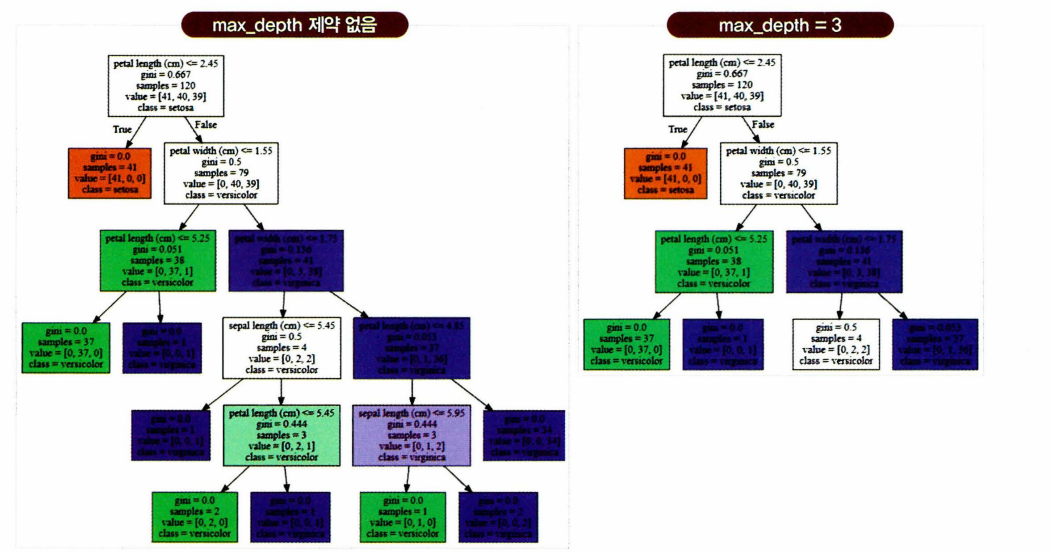




- feature_importance_=[0.01,0.02,0.03,0.9]: , 피처 지표별 중요도 할당됨, 값이 높을수록 중요도가 높음.

(4) 결정 트리 과적합
- make_classification(): 분류를 위한 데스트용 데이터 생성, 피처 데이터 세트/클래스 레이블 데이터 세트 반환
- visualize_boundary(): 머신러닝 모델의 예측 기준을 색과 경계로 나타내 예측분류 이해 도움(정의 필요)
- 디폴트 파라미터로는 이상치 데이터 분류를 위해 분할이 자주 일어남. 하이퍼 파라미터 조정을 통해 결정기준 경계 완화
- 트리 생성 조건 제약으로 테스트 세트 분류 정확도 높임(일반화)

(5) 결정 트리 실습

- 중복 피처명은 변경하게 데이터프레임으로 로드 필요
- 피처 타입 확인후 필요시 카테고리 인코딩
- value_counts()로 레이블 분포도 확인
- .grt_params(): 기본 파라미터 확인
- GridSearchCV()로 파라미터 조절
  - best_params_로 최적 파라미터 확인
  - scoring='accuracy' 정확도로 성능 확인
- features_importances_로 각 피처의 중요도 확인 가능, 높은 중요도 가진 피처들이 규칙 생성에 영향을 줌




### **[코드 필사]**

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붖꽃 데이터 세트 로딩, 세트 분리
iris_data=load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTree Classifier 학습.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [42]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

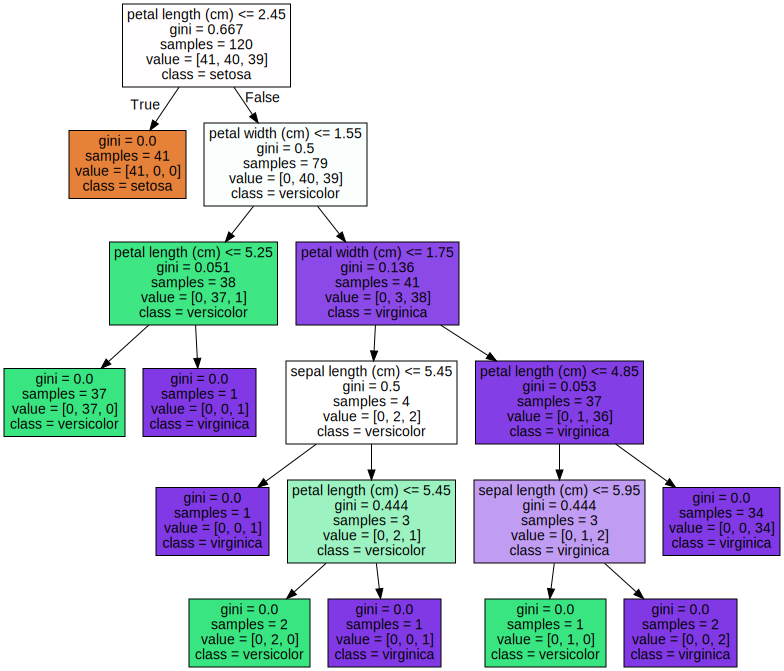

In [43]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm):0.025
sepal width (cm):0.000
petal length (cm):0.555
petal width (cm):0.420


<Axes: >

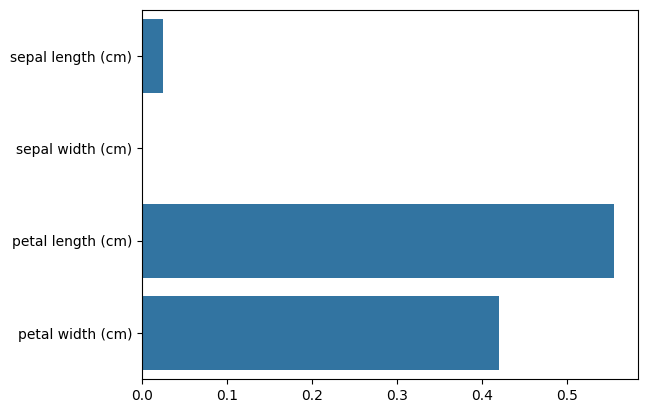

In [44]:
# 피처별 중요도 값 매핑, 막대그래프 표현
# petal_length가 가장 피처 중요도가 높다.

import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print("{0}:{1:.3f}".format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

- 결정 트리 과적합

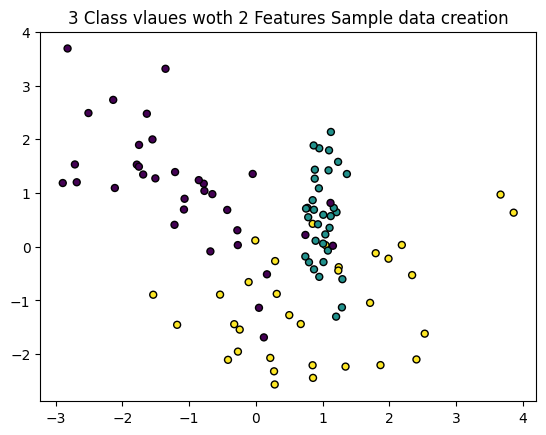

In [45]:
#  분류를 위한 데이터 셋 생성, 시각화
from ast import increment_lineno
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class vlaues woth 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처를 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

In [46]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

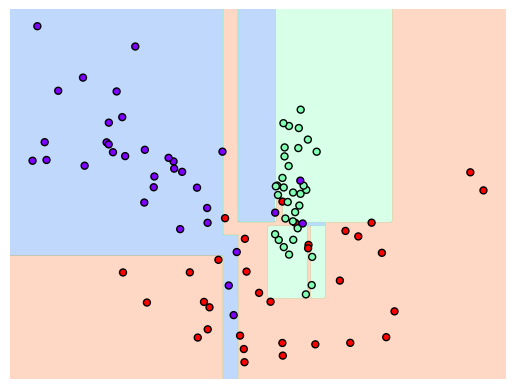

In [47]:
from sklearn.tree import DecisionTreeClassifier
# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

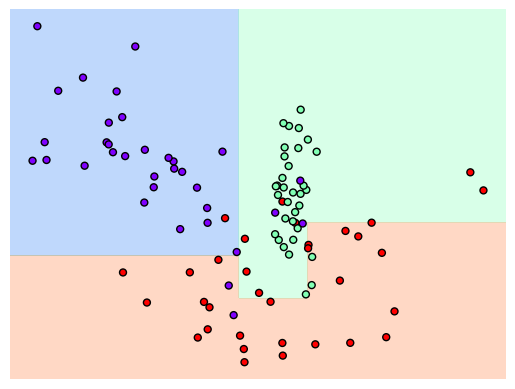

In [48]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

- 결정트리 실습- 사용자 행동인식 데이터 세트

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('/content/drive/MyDrive/ESAA/과제/human_activity/features.txt', sep='\s+', header=None, names=['column_index','column_name'])

# 피처명 index를 제거하고 피처명만 리스트 객체로 생성한 뒤 샘플로 10개 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [50]:
# 중복 피처명 확인 -> 42개 피처명 중복
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [51]:
# 중복 피처명에 대해 _1,_2 추가하여 새로운 피처명 반환
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)

  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

In [52]:
import pandas as pd
def get_human_dataset():
    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/content/drive/MyDrive/ESAA/과제/human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스크 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩, 칼럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/ESAA/과제/human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('/content/drive/MyDrive/ESAA/과제/human_activity/test/X_test.txt', sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/MyDrive/ESAA/과제/human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/ESAA/과제/human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [53]:
##학습 피처 데이터셋 info() 살펴보기
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [54]:
# 레이블 분포 살피기
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [55]:
# 동작 예측 분류 수행

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


In [56]:
# 결정트리의 깊이가 예측 정확도에 주는 영향
from sklearn.model_selection import GridSearchCV

params={'max_depth':[6,8,10,12,16,20,24], 'min_samples_split':[16]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy',cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [57]:
# GridSearchCV 객체의 cv_results_ 속성을 DF로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라키터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [58]:
# 별도의 테스트 데이터 세트에서의 결정트리 정확도 측정
max_depth = [6,8,10,12,16,20,24]
# max_depth값을 변화시키면서 그때마다 학습과 테스트 데이터 세트에서의 예측 성능 측정
for depth in max_depth:
  dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8551
max_depth = 8 정확도: 0.8717
max_depth = 10 정확도: 0.8599
max_depth = 12 정확도: 0.8571
max_depth = 16 정확도: 0.8599
max_depth = 20 정확도: 0.8565
max_depth = 24 정확도: 0.8565


In [59]:
# 정확도 성능 튜닝
params = {
    'max_depth':[8,12,16,20],
    'min_samples_split':[16,24]
}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy',cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치:0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [60]:
best_df_clf = grid_cv.best_estimator_
pred1=best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


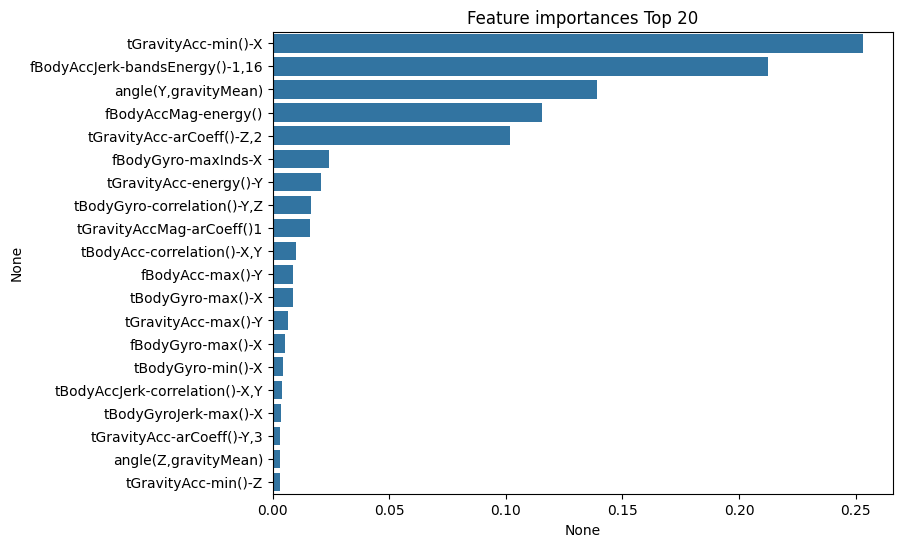

In [61]:
# 중요도가 높은 순으로 막대그래프 변환
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본의 막대그래프로 표현하기 위해 시리즈 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

# 중요도값 순으로 Serires 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()